In [1]:
import keras
from keras import layers
from keras.layers import Input
from keras.models import Model
from IPython.display import SVG
from keras.utils import plot_model
from keras.layers import Flatten, Dense
from keras.layers import Conv2D, MaxPooling2D
from keras.utils.vis_utils import model_to_dot

/home/savath/.virtualenvs/wazir/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
input_img = Input(shape=(28, 28, 1))
#BRANCH A
A= Conv2D(64, (1,1), padding='same', activation='relu',name='BRANCH_A_1X1_CONV')(input_img)

#BRANCH B
B = Conv2D(64, (1,1), padding='same', activation='relu',name='BRANCH_B_1X1_CONV')(input_img)
B = Conv2D(64, (3,3), padding='same', activation='relu',name='BRANCH_B_3X3_CONV')(B)

#BRANCH C
C = Conv2D(64, (1,1), padding='same', activation='relu',name='BRANCH_C_1X1_CONV')(input_img)
C = Conv2D(64, (5,5), padding='same', activation='relu',name='BARNCH_C_5X5_CONV')(C)
# concatenation
Filter_Concatenate = keras.layers.concatenate([A, B, C], axis = 3)
#BRANCH D
E = Conv2D(64, (1,1), padding='same', activation='relu',name='BRANCH_C_D1X1_CONV')(Filter_Concatenate)
E = Conv2D(64, (5,5), padding='same', activation='relu',name='BARNCH_C_E5X5_CONV')(E)
#BRANCH E
G = MaxPooling2D((3,3), strides=(1,1), padding='same',name='BRANCH_GD_3X3_MAXPO')(E)
G = Conv2D(64, (1,1), padding='same', activation='relu',name='BRANCH_HD_1X1_CONV')(G)
Filter_Concatenate1 = keras.layers.concatenate([E,G], axis = 3)
# add dense layers
output = layers.Flatten()(Filter_Concatenate1)
output = layers.Dense(32, activation='relu')(output)
output = layers.Dense(10, activation='softmax')(output)
model = Model(inputs=input_img, outputs=output)


In [3]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
BRANCH_B_1X1_CONV (Conv2D)      (None, 28, 28, 64)   128         input_1[0][0]                    
__________________________________________________________________________________________________
BRANCH_C_1X1_CONV (Conv2D)      (None, 28, 28, 64)   128         input_1[0][0]                    
__________________________________________________________________________________________________
BRANCH_A_1X1_CONV (Conv2D)      (None, 28, 28, 64)   128         input_1[0][0]                    
__________________________________________________________________________________________________
BRANCH_B_3

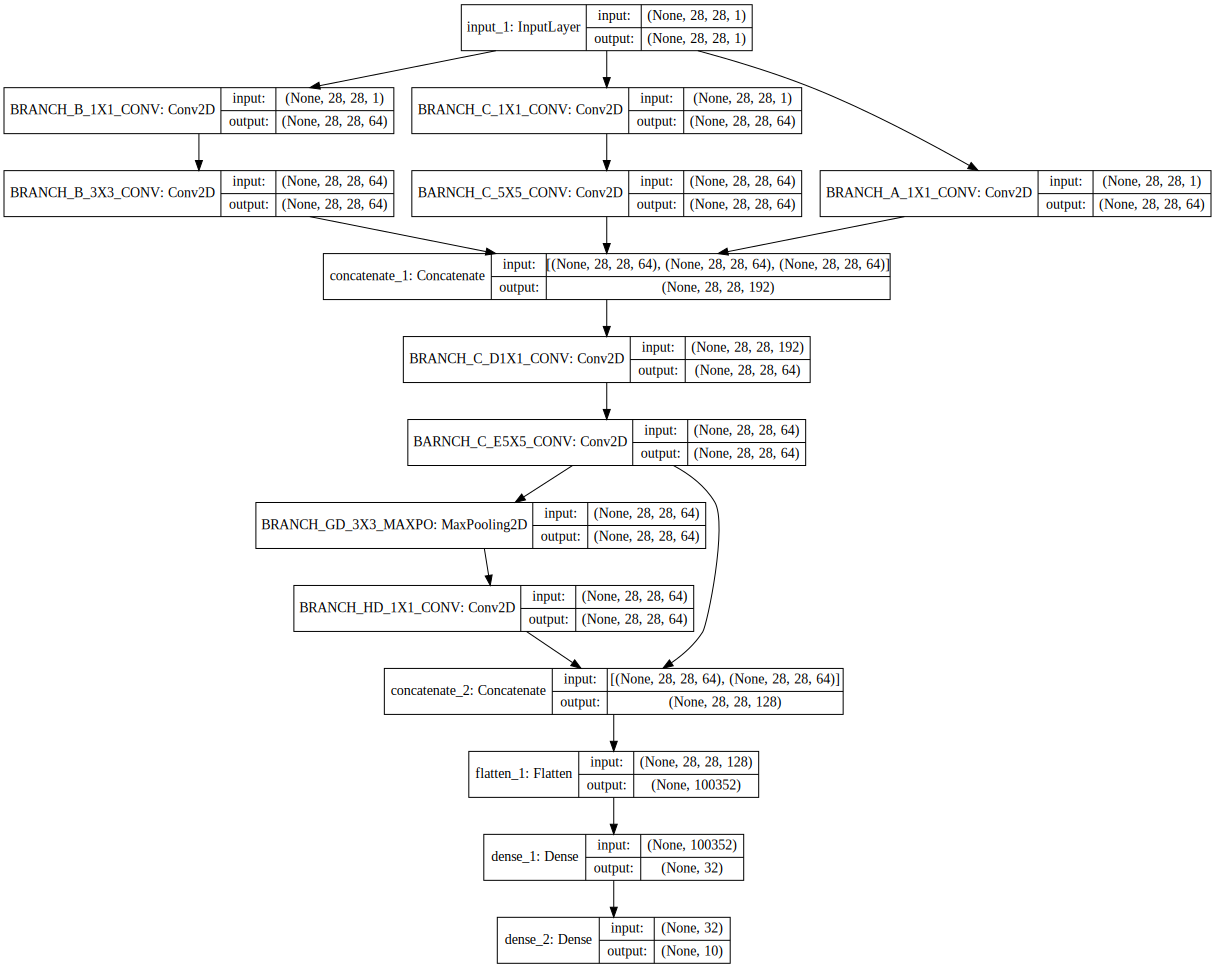

In [4]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [5]:
plot_model(model, to_file='CONCATENATELAYER.png')